# Outline of data analysis with Pandas:
***


1. Importing data (from FIJI results table or any other source)
*** 
2. Previewing Data
    * Head and tail
    * Data validation
    * Statistics of data set
        * *Min, max, standard deviation, etc.*
***    
3. Working with Data
    * loc vs iloc
    * Selecting columns
        * *Statistics on column*
    * Adding data to data frame
    * Performing operations on a column
***
4. Quick plotting for data preview
***

### Importing data
Python has built in functions for importing csv files, which we can use here to read the data in as lists
***

In [1]:
# Read the csv file the using Python built in functions
import csv
areas_list = []  #initialize an empty list to put the row numbers in
with open('Results_biology.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        #print(row)
        #print(row[0])
        #print(row[0],row[1],row[2],)
        areas_list.append(row[1])

## Refresher excerises

In [2]:
#look at just the areas.  How do we slice to get rid of the first entry?
areas_list
areas_list[1:]

In [3]:
# What happens if we try to add together areas_list[1] and areas_list[2]?
areas_list[1] + areas_list[2]

In [4]:
#Convert the value to a floating point number and add the number 2 to it
float(areas_list[1]) +2


2.079

In [5]:
#The list of areas is a list of strings, we need to change it to a list of floating point numbers
areas = list(map(float, areas_list[1:]))

#Calculate the max of just the areas 
max(areas)


0.144

#### Excerise

Calculate the min of the areas

---

In [6]:
#minimum of areas list
min(areas)

0.025

#### Use the statistics package to determine the standard deviation of the areas

In [7]:
from statistics import stdev
stdev(areas)

0.03232499440306053

### We can easily create a dataframe to hold the imported csv data from a file using Pandas and numpy instead of reading in using csv read, just a shortcut to get a dataframe
***

In [8]:
#Input csv file as dataframe
import pandas as pd
import numpy as np

#Read in data as data frame
df_old= pd.read_csv('Results_biology.csv',skiprows=range(21,101))  #range to skip
df_old.head()  #head shows just the first five entries of the dataframe

,,Area,Min,Max
0,1,0.079,255,255
1,2,0.025,255,255
2,3,0.097,255,255
3,4,0.100,255,255
4,5,0.075,255,255


### When we import the dataframe, it generates an index to the rows, so we can select them. 
 What does setting the *index_col=0* flag do?  What if we change it to other columns?
 ***

In [9]:
df = pd.read_csv('Results_biology.csv', skiprows=range(21,101), index_col = 0)
#Whats the difference between the two indicies?
df.head()

,Area,Min,Max
,,,
1,0.079,255,255
2,0.025,255,255
3,0.097,255,255
4,0.100,255,255
5,0.075,255,255


## We can find out information about the dataframe as a whole using pandas functions:
***

In [10]:
df.info()  #find out information about the whole dataset, (i.e. how many objects there are in each column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 3 columns):
Area    20 non-null float64
Min     20 non-null int64
Max     20 non-null int64
dtypes: float64(1), int64(2)
memory usage: 640.0 bytes


In [11]:
df.shape  #find the number of rows and columns

(20, 3)

### Excercises, find the min, max and standard deviation of the areas of the dataframe columns

In [12]:
#Find the min, max, mean area of the dataset
df.min()


Area      0.025
Min     255.000
Max     255.000
dtype: float64

In [13]:
#Find the max
df.max()


Area      0.144
Min     255.000
Max     255.000
dtype: float64

In [14]:
#Find the mean
df.mean()

Area      0.0798
Min     255.0000
Max     255.0000
dtype: float64

In [15]:
#Find the standard deviation of the dataset
df.std()

Area    0.032325
Min     0.000000
Max     0.000000
dtype: float64

In [16]:
df.describe()  #find out all the stats in one go 

,Area,Min,Max
count,20.000000,20.0,20.0
mean,0.079800,255.0,255.0
std,0.032325,0.0,0.0
min,0.025000,255.0,255.0
25%,0.063500,255.0,255.0
50%,0.069500,255.0,255.0
75%,0.097750,255.0,255.0
max,0.144000,255.0,255.0


### Showing a single row or single value: loc vs iloc
***


In [17]:
df.head()

,Area,Min,Max
,,,
1,0.079,255,255
2,0.025,255,255
3,0.097,255,255
4,0.100,255,255
5,0.075,255,255


In [18]:
df.loc[1,:]  #loc looks for a particular label on an index

Area      0.079
Min     255.000
Max     255.000
Name: 1, dtype: float64

In [19]:
df.iloc[1,:] #iloc is integer loc, looks at the specific POSITION of the index.

Area      0.025
Min     255.000
Max     255.000
Name: 2, dtype: float64

## Selecting a single column using indexing
* Single and double square bracket indexing
***

In [20]:
df['Area'].head()  #view the first few rows of area, comes out as a series

 
1    0.079
2    0.025
3    0.097
4    0.100
5    0.075
Name: Area, dtype: float64

In [21]:
df[['Area']].head()

,Area
,
1,0.079
2,0.025
3,0.097
4,0.100
5,0.075


## Working with the data, statistics of a column

In [22]:
df[['Area']].describe()

,Area
count,20.000000
mean,0.079800
std,0.032325
min,0.025000
25%,0.063500
50%,0.069500
75%,0.097750
max,0.144000


In [23]:
df.Area.describe() #Sometimes we see the dot notation, it's not ideal though, as we can't use spaces

count    20.000000
mean      0.079800
std       0.032325
min       0.025000
25%       0.063500
50%       0.069500
75%       0.097750
max       0.144000
Name: Area, dtype: float64

In [24]:
df[['Area']].min()  #Finding the column min using a dataframe approach

Area    0.025
dtype: float64

In [25]:
df['Area'].min()  #Finding the column min using a series approach

0.025

### Excercise: Find the min, max and mean of the area column, and set them equal to area_max, area_min and area_mean and make an output print statement saying what they are

In [26]:
#Find the min, max and mean of the area column, and set them equal to area_max, area_min and area_mean and make an 
#output print statement saying what they are

area_min = df['Area'].min()
area_max = df['Area'].max()
area_mean = df['Area'].mean()

print('The minimum area of a found circle is:', area_min, 'square pixels')
print('The maximum area of a found circle is:', area_max, 'square pixels')
print('The mean area of a found circle is:', area_mean, 'square pixels')


The minimum area of a found circle is: 0.025 square pixels
The maximum area of a found circle is: 0.14400000000000002 square pixels
The mean area of a found circle is: 0.07980000000000001 square pixels


### Formatting numbers

You can round numbers to the a decimal point using round(number, num_of_decimals)
you can format a number using format spec, https://pyformat.info/  
"{:4.1f}" gives us at least four characters, with one after the decimal point.  


In [27]:
#Rounding example
test_number = 1234.56789  #generate a test number
round(test_number,3)   #round test number

1234.568

In [28]:
"{:1.1f}".format(test_number)  #if we change the number before the decimal point, we end up with more white space

'1234.6'

In [29]:
# Format the numbers to significant figures
print('The minimum area of a found circle is:', round(area_min,2), 'square pixels')
print('The maximum area of a found circle is:', "{:1.2f}".format(area_max), 'square pixels')
print('The mean area of a found circle is:', round(area_mean,4), 'square pixels')

The minimum area of a found circle is: 0.03 square pixels
The maximum area of a found circle is: 0.14 square pixels
The mean area of a found circle is: 0.0798 square pixels


## Calculations on a column
### Can we find the radii of the shapes?
***

In [30]:
#Can we find the radii of the shapes?
#recall area=pi*r^2
#r=sqrt(area/pi)

# This makes a new list of just the radii

radius = np.sqrt(df['Area']/np.pi)
radius.head()

 
1    0.158576
2    0.089206
3    0.175716
4    0.178412
5    0.154510
Name: Area, dtype: float64

#### Perform a mathematical operation and add a column to a dataframe

In [31]:
df['radius'] = radius*100
df.head()

,Area,Min,Max,radius
,,,,
1,0.079,255,255,15.857642
2,0.025,255,255,8.920621
3,0.097,255,255,17.571585
4,0.100,255,255,17.841241
5,0.075,255,255,15.450968


### Removing columns from dataframe
***

In [32]:
#Delete the column for radius?
df = df.drop(columns="radius")
df.head()

,Area,Min,Max
,,,
1,0.079,255,255
2,0.025,255,255
3,0.097,255,255
4,0.100,255,255
5,0.075,255,255


In [33]:
#Can we add the radius to the data frame directly?
df[['radii']] = np.sqrt(df[['Area']]/np.pi)*100
df.head()

,Area,Min,Max,radii
,,,,
1,0.079,255,255,15.857642
2,0.025,255,255,8.920621
3,0.097,255,255,17.571585
4,0.100,255,255,17.841241
5,0.075,255,255,15.450968


### Excercise, compute the diameter and add a diameter column to the data frame
***

In [34]:
#Excercise, compute the diameter and add a diameter column to the data frame
df['diameter']  = df['radii']*2
df.head()

,Area,Min,Max,radii,diameter
,,,,,
1,0.079,255,255,15.857642,31.715284
2,0.025,255,255,8.920621,17.841241
3,0.097,255,255,17.571585,35.143169
4,0.100,255,255,17.841241,35.682482
5,0.075,255,255,15.450968,30.901936


### Excercise, find the mean and standard deviation of the radii.  How do the compare to what we put in to our sample image?
***

In [35]:
#Find the mean and standard deviation of the radii, compare to the inputs
mean_radius = df['radii'].mean()
print('The mean radius is:', round(mean_radius,3), 'pixels')


The mean radius is: 15.622 pixels


### Use the same syntax to find just the standard deviation of the radii
***

In [36]:
radii_std = df['radii'].std()
print('The standard deviation of the radii is:', "{:.4}".format(radii_std), 'pixels' )
radii_std

The standard deviation of the radii is: 3.238 pixels


3.237872482461093

In [37]:
print('The standard deviation of the radii is:', round(radii_std, 3), 'pixels')
radii_std

The standard deviation of the radii is: 3.238 pixels


3.237872482461093

# Quick plot for seeing what we have
***

In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


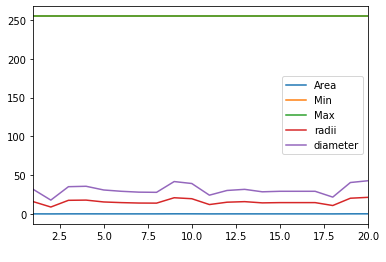

In [39]:
df.plot()

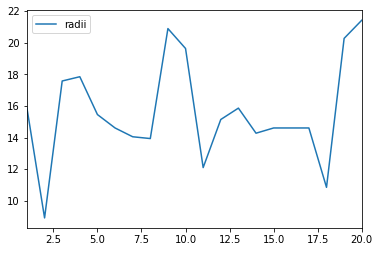

In [40]:
df.plot(y='radii')

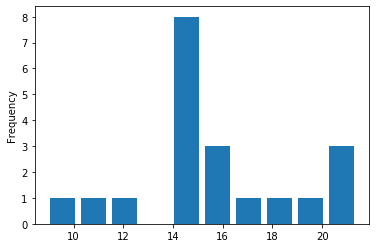

In [41]:
df.radii.plot(kind='hist', rwidth=0.8)